### EDA Practice Problem 5

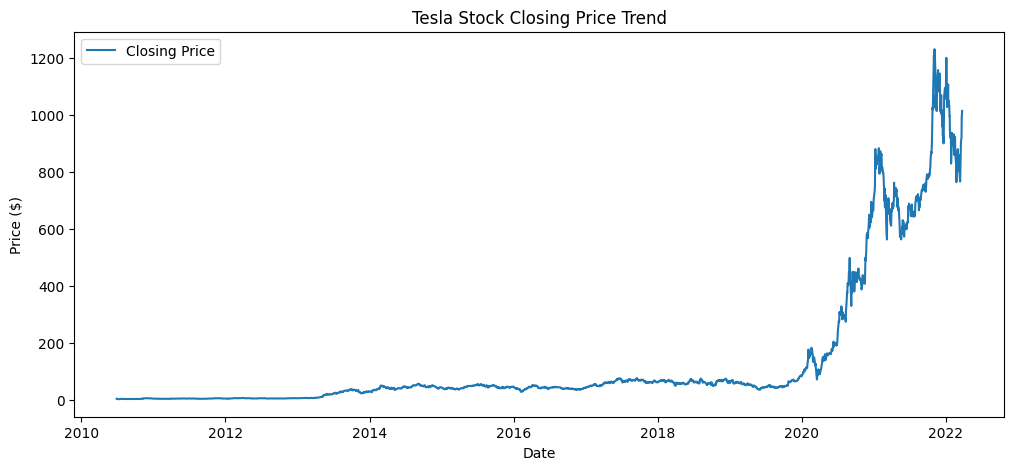

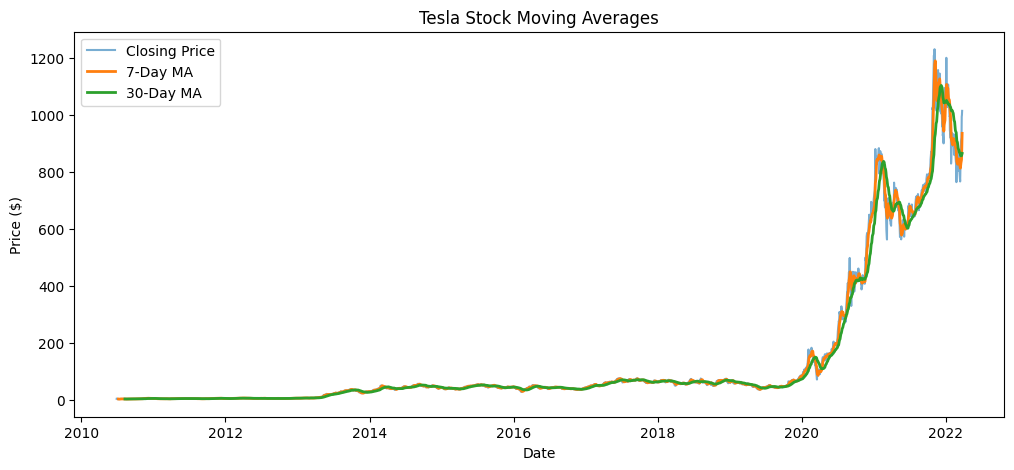

In [8]:
# Day 5 – Stock Market 📈

import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("tesla.csv", parse_dates=["Date"])
df.set_index("Date", inplace=True)

# 🔹 Plot Closing Price Trend
plt.figure(figsize=(12,5))
plt.plot(df["Close"], label="Closing Price")
plt.title("Tesla Stock Closing Price Trend")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

# 🔹 Calculate Moving Averages (7 & 30 days)
df["MA7"] = df["Close"].rolling(window=7).mean()
df["MA30"] = df["Close"].rolling(window=30).mean()

plt.figure(figsize=(12,5))
plt.plot(df["Close"], label="Closing Price", alpha=0.6)
plt.plot(df["MA7"], label="7-Day MA", linewidth=2)
plt.plot(df["MA30"], label="30-Day MA", linewidth=2)
plt.title("Tesla Stock Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.show()



📌 Highest Closing Price: $1229.91 on 2021-11-04

Correlation Matrix:
            Open      High       Low     Close
Open   1.000000  0.999726  0.999617  0.999247
High   0.999726  1.000000  0.999595  0.999666
Low    0.999617  0.999595  1.000000  0.999670
Close  0.999247  0.999666  0.999670  1.000000


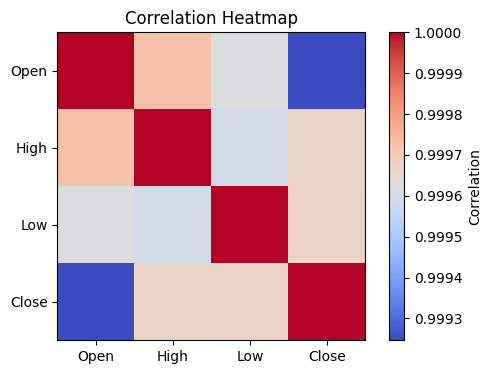

In [7]:
# 🔹 Find Max Closing Price & Date
max_close = df["Close"].max()
max_date = df["Close"].idxmax()
print(f"📌 Highest Closing Price: ${max_close:.2f} on {max_date.date()}")

# 🔹 Correlation between Open, High, Low, Close
corr = df[["Open", "High", "Low", "Close"]].corr()
print("\nCorrelation Matrix:\n", corr)

plt.figure(figsize=(6,4))
plt.imshow(corr, cmap="coolwarm", interpolation="none")
plt.colorbar(label="Correlation")
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap")
plt.show()

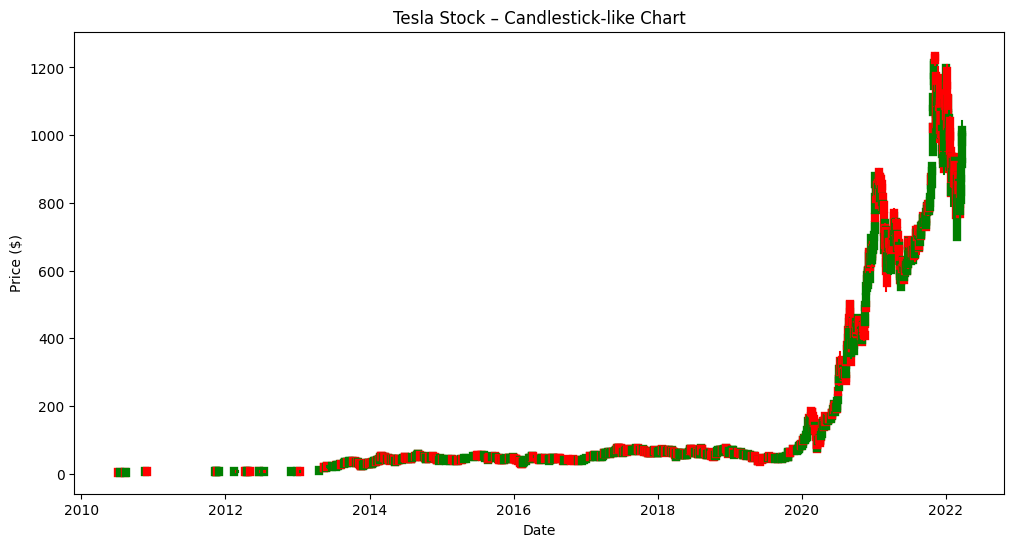

In [6]:
# 🔹 Candlestick-like Visualization (Matplotlib)
plt.figure(figsize=(12,6))
for i in range(len(df)):
    color = "green" if df["Close"].iloc[i] >= df["Open"].iloc[i] else "red"
    # Wick (High-Low line)
    plt.plot([df.index[i], df.index[i]], 
             [df["Low"].iloc[i], df["High"].iloc[i]], 
             color=color)
    # Body (Open-Close rectangle)
    plt.plot([df.index[i], df.index[i]], 
             [df["Open"].iloc[i], df["Close"].iloc[i]], 
             linewidth=6, color=color)

plt.title("Tesla Stock – Candlestick-like Chart")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.show()